In [550]:
# Importing all the essential Python libraries

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from datetime import datetime
import yfinance as yf
from forex_python.converter import CurrencyCodes

In [551]:
# Setting the Start and End date for Stock Market Analysis

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [552]:
# Enter the Stock

stock = "ADANIENT.NS"

In [553]:
# Importing Stock prices using yfinance

STCK = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [554]:
# Getting the company's basic info

stock_info = yf.Ticker(stock).info

stock_name = stock_info.get('longName', 'Unknown Stock Name')
currency = stock_info.get('currency', 'USD')

currency_code = CurrencyCodes()
currency_symbol = currency_code.get_symbol(currency)

print("Company :",stock_name)
print("Currency :",currency)

Company : Adani Enterprises Limited
Currency : INR


In [555]:
# Some Basic info about the Stock

STCK.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS
count,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,3047.834644,3048.511886,3097.535035,3004.895097,3056.734014,2.529763e+06
std,193.786269,193.876010,187.442802,201.964383,196.211339,3.358415e+06
min,2183.649902,2183.649902,2251.949951,2025.000000,2101.000000,3.046730e+05
25%,2963.688782,2963.987427,3006.037415,2916.462463,2972.075073,1.033180e+06
50%,3079.408081,3080.449951,3123.949951,3041.050049,3088.775024,1.626807e+06
75%,3172.677979,3173.637451,3212.662476,3135.950012,3179.962463,2.615299e+06
max,3643.780518,3645.250000,3743.899902,3586.050049,3725.000000,2.287908e+07


In [556]:
STCK.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS
Date,,,,,,
2023-11-24,2224.552979,2225.449951,2251.949951,2160.899902,2179.000000,1946259
2023-11-28,2422.523193,2423.500000,2512.399902,2275.000000,2301.000000,11972275
2023-11-29,2395.634033,2396.600098,2477.649902,2390.000000,2468.699951,4561574
2023-11-30,2357.599365,2358.550049,2409.000000,2343.050049,2400.050049,2983879
2023-12-01,2361.747559,2362.699951,2403.350098,2354.100098,2370.000000,1792983


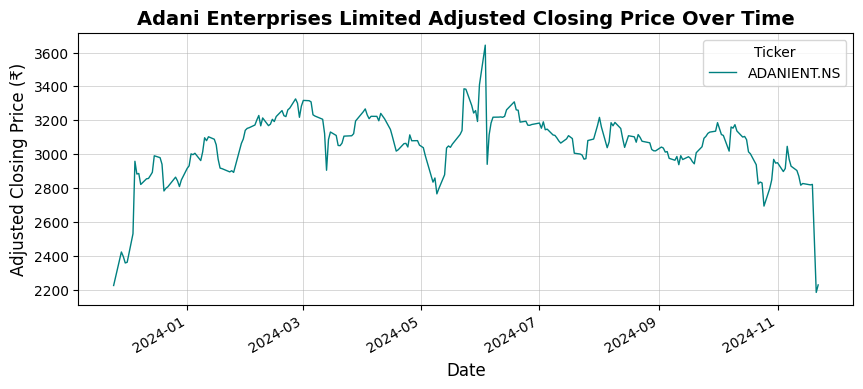

In [557]:
# Plotting Adjusted Closing Price for the Stock
STCK['Adj Close'].plot(legend=True, figsize=(10, 4), color='teal', linewidth=1)

plt.title(f"{stock_name} Adjusted Closing Price Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel(f"Adjusted Closing Price ({currency_symbol})", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

legend = plt.legend([stock], fontsize=10)
legend.set_title("Ticker", prop={'size': 10})

plt.show()

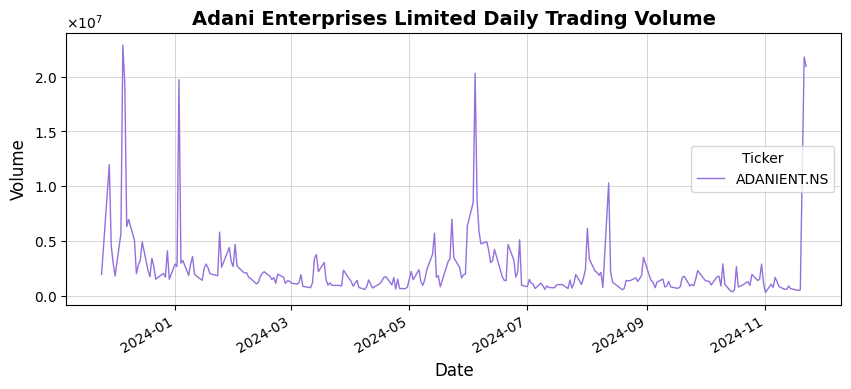

In [558]:
# Plotting the total volume of stock being traded each day

STCK['Volume'].plot(legend=True, figsize=(10, 4), color='mediumpurple', linewidth=1)

plt.title(f"{stock_name} Daily Trading Volume", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

legend = plt.legend([stock], fontsize=10)
legend.set_title("Ticker", prop={'size': 10})

plt.show()

In [559]:
# Calculating Moving Average for 10, 20, and 50 days of the stock price

ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    STCK[column_name] = STCK['Adj Close'].rolling(window=ma).mean()

STCK.head()

Price,Adj Close,Close,High,Low,Open,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Ticker,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,,,
Date,,,,,,,,,
2023-11-24,2224.552979,2225.449951,2251.949951,2160.899902,2179.000000,1946259,NaN,NaN,NaN
2023-11-28,2422.523193,2423.500000,2512.399902,2275.000000,2301.000000,11972275,NaN,NaN,NaN
2023-11-29,2395.634033,2396.600098,2477.649902,2390.000000,2468.699951,4561574,NaN,NaN,NaN
2023-11-30,2357.599365,2358.550049,2409.000000,2343.050049,2400.050049,2983879,NaN,NaN,NaN
2023-12-01,2361.747559,2362.699951,2403.350098,2354.100098,2370.000000,1792983,NaN,NaN,NaN


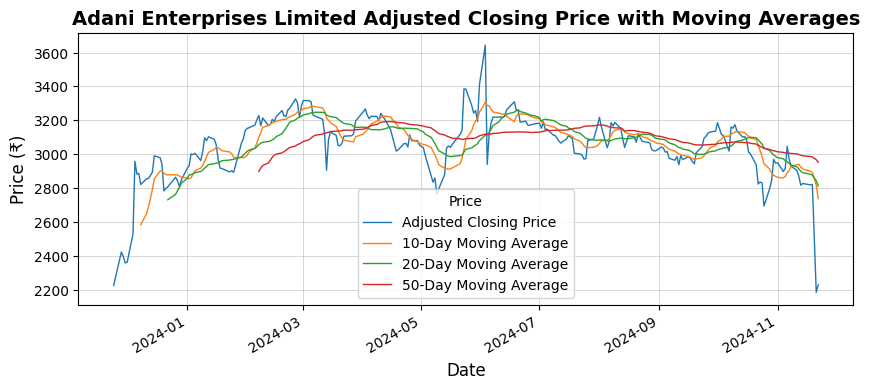

In [560]:
# Plotting the moving averages and Adjusted Closing Price for the stock

STCK[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(10, 4), linewidth=1)

plt.title(f"{stock_name} Adjusted Closing Price with Moving Averages", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel(f"Price ({currency_symbol})", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

legend = plt.legend(["Adjusted Closing Price", "10-Day Moving Average", "20-Day Moving Average", "50-Day Moving Average"], fontsize=10)
legend.set_title("Price", prop={'size': 10})

plt.show()

In [561]:
# Calculating Daily Returns

STCK['Daily Return'] = STCK['Adj Close'].pct_change()

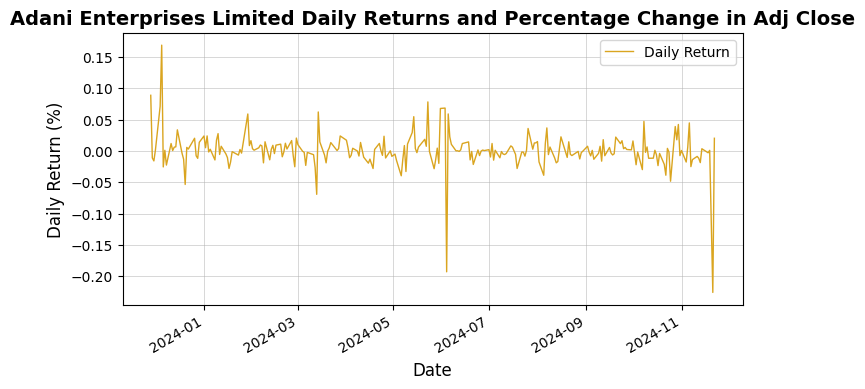

In [562]:
# Plotting Daily Returns as a function of Percent Change in Adjusted Close Value

STCK['Daily Return'].plot(figsize=(8, 4), color='goldenrod', linewidth=1)

plt.title(f"{stock_name} Daily Returns and Percentage Change in Adj Close", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Return (%)", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

plt.legend(["Daily Return"], fontsize=10)

plt.show()

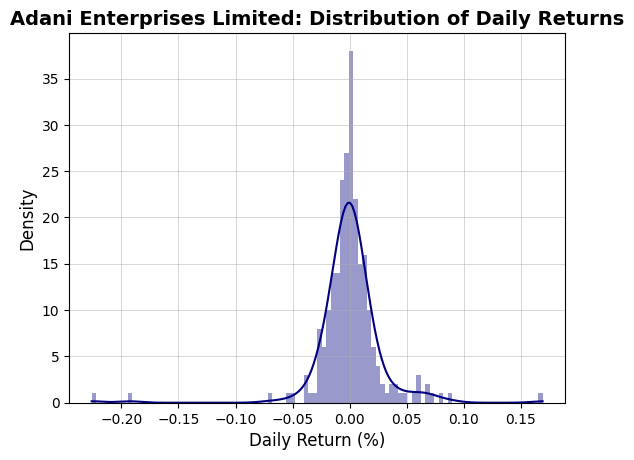

In [563]:
# Plotting the average daily returns of the stock

sns.histplot(STCK['Daily Return'].dropna(), bins=100, kde=True, edgecolor=None, alpha=0.4, color='navy', linewidth=1)

plt.title(f"{stock_name}: Distribution of Daily Returns", fontsize=14, fontweight='bold')
plt.xlabel("Daily Return (%)", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

plt.show()

In [564]:
# Comparing Risk and Expected returns

rets = STCK['Daily Return'].dropna()
area = np.pi*15

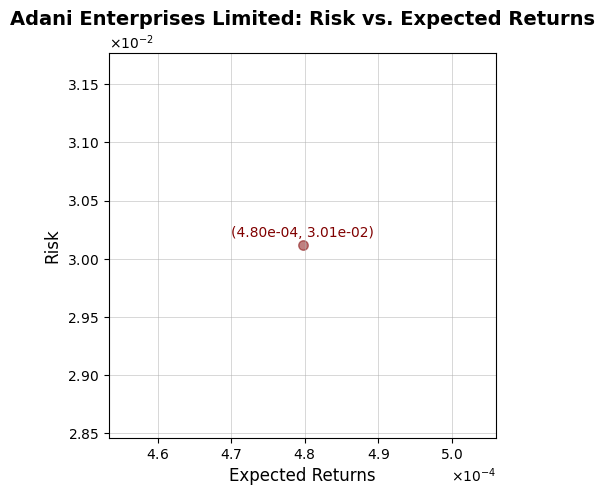

In [565]:
# Creating the scatter plot

plt.figure(figsize=(5, 5))
plt.scatter(rets.mean(), rets.std(), s=area, color='maroon', alpha=0.5)
plt.title(f"{stock_name}: Risk vs. Expected Returns", fontsize=14, fontweight='bold')

# Mean of Daily Returns
plt.xlabel("Expected Returns", fontsize=12)

# Standard Deviation of Daily Returns
plt.ylabel("Risk", fontsize=12)

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='scientific', axis='x', scilimits=(0, 0))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

coords_text = f"({rets.mean():.2e}, {rets.std():.2e})"
plt.annotate(coords_text,xy=(rets.mean(), rets.std()),xytext=(rets.mean(), rets.std() + 0.00007), fontsize=10, ha='center', color='maroon')

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

plt.show()

In [566]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

STCK['Daily Return'].quantile(0.05)

-0.027971930836796045

In [ ]:
# Monte Carlo Simulation

days = 365

dt = 1/days
mu = rets.mean()
sigma = rets.std()

In [568]:
# Defining the Monte Carlo Simulation Function

def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

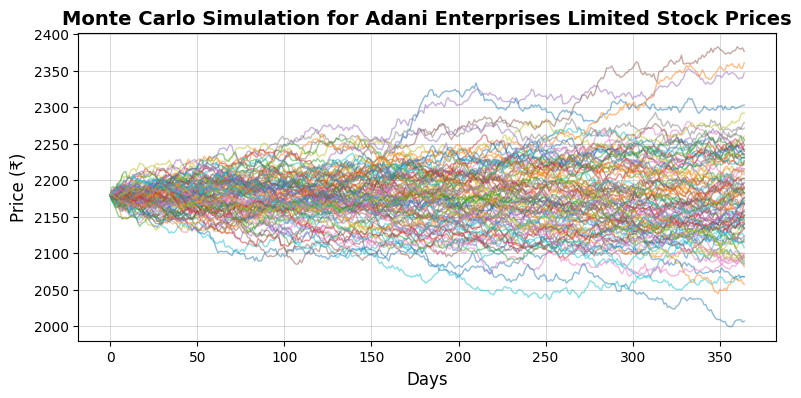

In [569]:
# Running the Monte Carlo simulation a hundred times

start_price = STCK['Open'].iloc[0].item()

# Monte Carlo Simulation Plot
plt.figure(figsize=(9, 4))

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), linewidth=1, alpha=0.5)

plt.title(f"Monte Carlo Simulation for {stock_name} Stock Prices", fontsize=14, weight='bold')
plt.xlabel("Days", fontsize=12)
plt.ylabel(f"Price ({currency_symbol})", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

plt.show()

In [570]:
# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 100000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

q = np.percentile(simulations,1)

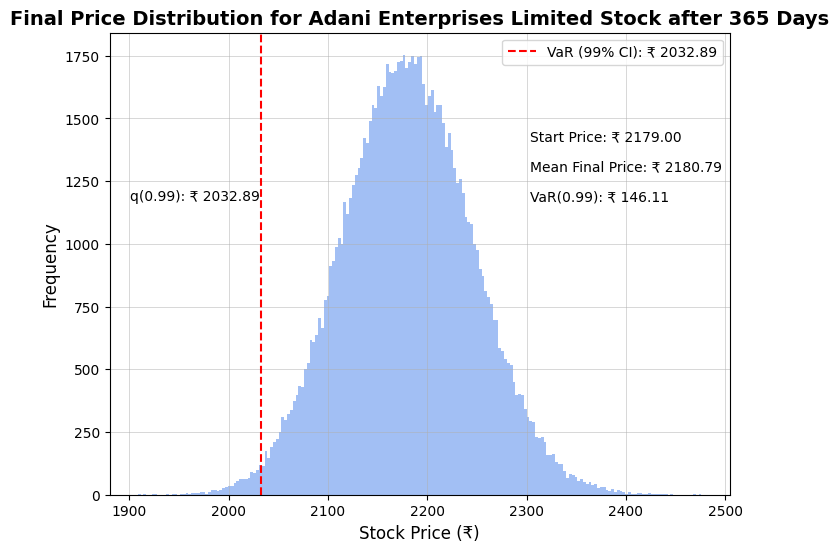

In [571]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.figure(figsize=(8, 6))

plt.hist(simulations, bins=200, color='cornflowerblue', alpha=0.6)

plt.figtext(0.65, 0.7, s=f"Start Price: {currency_symbol} {start_price:.2f}", fontsize=10, color='black')
plt.figtext(0.65, 0.65, s=f"Mean Final Price: {currency_symbol} {simulations.mean():.2f}", fontsize=10, color='black')
plt.figtext(0.65, 0.6, s=f"VaR(0.99): {currency_symbol} {start_price - q:.2f}", fontsize=10, color='black')
plt.figtext(0.15, 0.6, s=f"q(0.99): {currency_symbol} {q:.2f}", fontsize=10, color='black')

plt.axvline(x=q, linewidth=1.5, color='red', linestyle='--', label=f"VaR (99% CI): {currency_symbol} {q:.2f}")

plt.title(f"Final Price Distribution for {stock_name} Stock after {days} Days", fontsize=14, weight='bold')
plt.xlabel(f"Stock Price ({currency_symbol})", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.legend(loc="upper right", fontsize=10)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

plt.show()